# Machine Learning - Random Forest (Floresta Aleatória)

#### Importação das bibliotecas necessárias

In [37]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [38]:
df_edu = pd.read_csv('xAPI-Edu-Data.csv')

In [39]:
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Verificando as distribuições de classes.

In [40]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [41]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

In [42]:
# Put our datafram in a var
Features = df_edu
# Filter all var 'object' type
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
# Using LabelEncoder to transform 'object' types to numeric 
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [43]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### Dividindo os dados em treino e teste

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a forma dos dados

In [46]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [47]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [48]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [49]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [50]:
resultado = random_clf.predict(X_test)

In [51]:
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [52]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        39
           1       0.82      0.91      0.86        34
           2       0.79      0.76      0.78        71

    accuracy                           0.78       144
   macro avg       0.78      0.80      0.79       144
weighted avg       0.78      0.78      0.78       144



#### Verificando as features mais importantes para o modelo treinado

In [53]:
random_clf.feature_importances_

array([0.02105596, 0.03306286, 0.03524603, 0.01986695, 0.03452185,
       0.02169486, 0.04000949, 0.01152707, 0.04860859, 0.15430049,
       0.16543958, 0.1300496 , 0.08965736, 0.0354588 , 0.02319527,
       0.13630525])

In [54]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [55]:
feature_imp

VisITedResources            0.165440
raisedhands                 0.154300
StudentAbsenceDays          0.136305
AnnouncementsView           0.130050
Discussion                  0.089657
Relation                    0.048609
Topic                       0.040009
ParentAnsweringSurvey       0.035459
PlaceofBirth                0.035246
GradeID                     0.034522
NationalITy                 0.033063
ParentschoolSatisfaction    0.023195
SectionID                   0.021695
gender                      0.021056
StageID                     0.019867
Semester                    0.011527
dtype: float64

#### Features mais importantes de forma gráfica

In [56]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

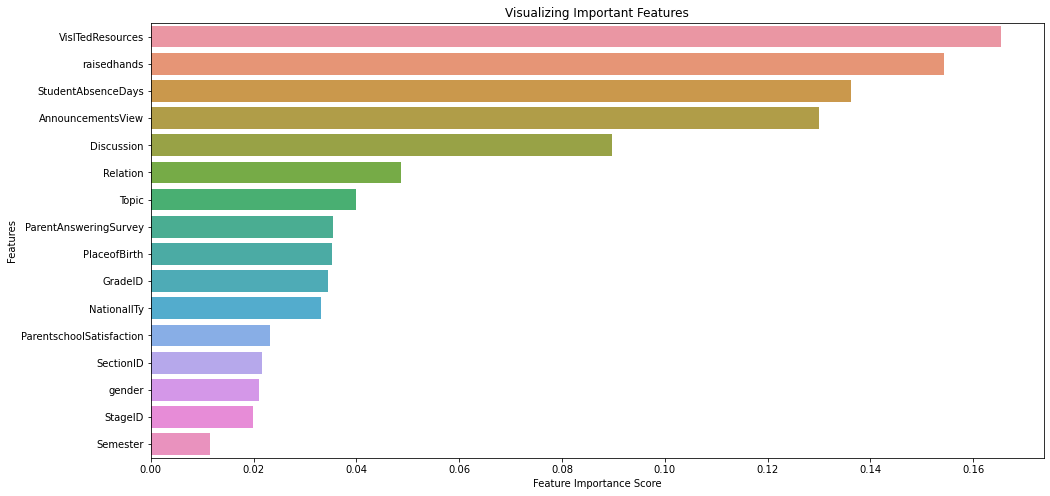

In [57]:
visualiza_features_importantes(feature_imp)

#### Selecionando apenas as features com importancia acima de um determinado score.

In [58]:
features_selecionadas = []
# Limit our features to them higher than 0.03 score
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.16543957536468157
raisedhands:	0.1543004881580454
StudentAbsenceDays:	0.13630524554845516
AnnouncementsView:	0.13004959986422282
Discussion:	0.08965736036137388
Relation:	0.04860859360471799
Topic:	0.040009488818313475
ParentAnsweringSurvey:	0.03545879665531517
PlaceofBirth:	0.03524603442946194
GradeID:	0.03452184668606486
NationalITy:	0.03306286252758235


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

#### Verificando a nova forma dos dados

In [60]:
X_train.shape,X_test.shape

((336, 11), (144, 11))

In [61]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [62]:
random_clf = RandomForestClassifier(random_state=0)

#### Treinando novamente o modelo Random Forest

In [63]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [64]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [65]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        39
           1       0.80      0.94      0.86        34
           2       0.79      0.69      0.74        71

    accuracy                           0.76       144
   macro avg       0.75      0.78      0.76       144
weighted avg       0.76      0.76      0.75       144



## Explorando as árvores da Floresta gerada

In [66]:
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_)))
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))


Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 123
Profundidade da árvore: 12
Features importantes: [0.16309397 0.11847149 0.24943917 0.11965593 0.06677449 0.059832
 0.00600223 0.07343672 0.0872917  0.04800984 0.00799245]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=209652396, splitter='best')

Numero de nós: 155
Profundidade da árvore: 11
Features importantes: [0.156782   0.1745078  0.17276811 0.08526364 0.06156128 0.06467488
 0.07001021 0.10337816 0.03598508 0.05053693 0.02453191]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_de

#### Selecionando uma árvore da floresta

In [67]:
# Selecting one tree
tree0 = random_clf.estimators_[0]

#### Visualizando de forma gráfica

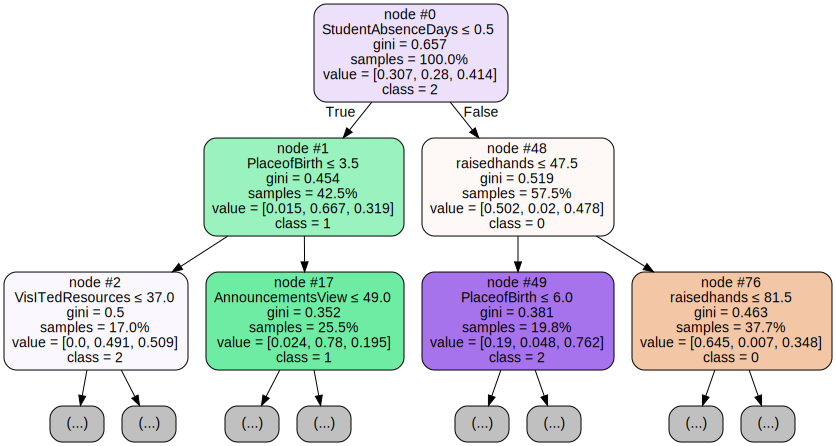

In [68]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Selecionando outra árvore da floresta

In [69]:
tree1 = random_clf.estimators_[1]

#### Visualizando de forma gráfica

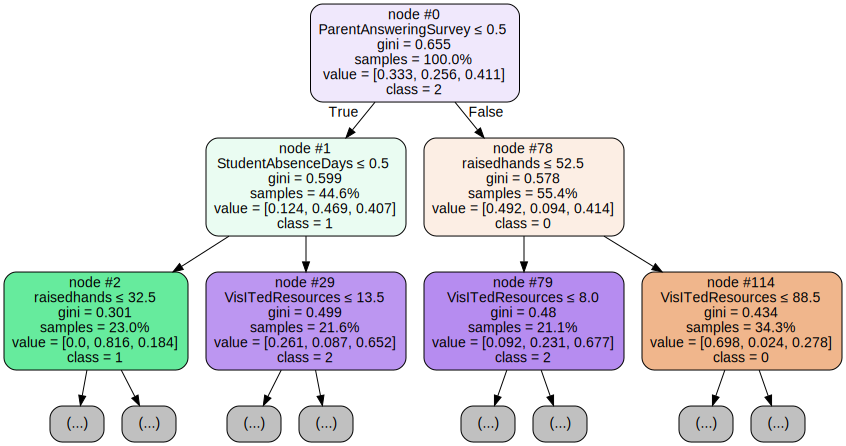

In [70]:
dot_data = export_graphviz(
         tree1,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

=========//=========================
# **Testing Models**

#### Separando os dados e classes

In [71]:
dataset = df_edu.drop('Class',axis=1)

In [72]:
classes = df_edu['Class']

# Random Forest vs Árvore de Decisão

#### **Resultados Random Forest**

In [73]:
# 100 random trees
random_clf = RandomForestClassifier(random_state=1,n_estimators=100)

In [74]:
# Cross validation
resultados_random = cross_val_predict(random_clf, dataset, classes, cv=5)

In [75]:
print(classification_report(classes,resultados_random))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       142
           1       0.77      0.78      0.77       127
           2       0.63      0.63      0.63       211

    accuracy                           0.67       480
   macro avg       0.68      0.68      0.68       480
weighted avg       0.67      0.67      0.67       480



#### **Resultados Decision Tree**

In [76]:
tree_clf = DecisionTreeClassifier(random_state=1)

In [77]:
resultados_tree = cross_val_predict(tree_clf,dataset,classes,cv=5)

In [78]:
print(classification_report(classes,resultados_tree))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55       142
           1       0.74      0.68      0.70       127
           2       0.54      0.49      0.52       211

    accuracy                           0.57       480
   macro avg       0.59      0.59      0.59       480
weighted avg       0.58      0.57      0.58       480



        We had a better accuracy using Random Forest in a standart configuration.

#### Verificando Overfitting

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=1)

In [80]:
def compara_modelos_random_forest(maxdepth):
    if maxdepth == 0:
        rf = RandomForestClassifier(n_estimators=100,random_state=1)
    else: 
        rf = RandomForestClassifier(n_estimators=100,random_state=1, max_depth=maxdepth)
    rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    return train_score,test_score

In [81]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos_random_forest(2))))
print('{:1}         {} '.format(3,str(compara_modelos_random_forest(3))))
print('{:1}         {} '.format(4,str(compara_modelos_random_forest(4))))
print('{:1}         {} '.format(10,str(compara_modelos_random_forest(10))))
print('{:1}         {} '.format(15,str(compara_modelos_random_forest(15))))
print('{:1}         {} '.format('Full',str(compara_modelos_random_forest(0))))

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.75, 0.6180555555555556) 
3         (0.8244047619047619, 0.6805555555555556) 
4         (0.8720238095238095, 0.7152777777777778) 
10         (1.0, 0.7569444444444444) 
15         (1.0, 0.7986111111111112) 
Full         (1.0, 0.7986111111111112) 


In [82]:
def compara_modelos_decision_tree(maxdepth):
    if maxdepth == 0:
        df = DecisionTreeClassifier(random_state=1)
    else: 
        df = DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    df.fit(X_train, y_train)
    train_score = df.score(X_train, y_train)
    test_score = df.score(X_test, y_test)
    return train_score,test_score

In [83]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos_decision_tree(2))))
print('{:1}         {} '.format(3,str(compara_modelos_decision_tree(3))))
print('{:1}         {} '.format(4,str(compara_modelos_decision_tree(4))))
print('{:1}         {} '.format(10,str(compara_modelos_decision_tree(10))))
print('{:1}         {} '.format(15,str(compara_modelos_decision_tree(15))))
print('{:1}         {} '.format('Full',str(compara_modelos_decision_tree(0))))

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.6398809523809523, 0.6805555555555556) 
3         (0.7321428571428571, 0.7013888888888888) 
4         (0.7916666666666666, 0.7430555555555556) 
10         (0.9910714285714286, 0.6875) 
15         (1.0, 0.6944444444444444) 
Full         (1.0, 0.6944444444444444) 


* max_depth = 2: 64% training and 68% testing score;
* max_depth = 3: 73% training and 70% testing score;
* max_depth = 4: 79% training and 74% testing score;
* max_depth = 4: 99% training (OVERFITTING) and 74% testing score;
.
.
.

==========================================//=========================================
# **Tunning do Modelo para Garantir o Melhor Desempenho**

#### Como encontrar os melhores valores para os parametros do modelo?

RandomForestClassifier(
n_estimators=?,
criterion='gini' ou 'entropy',
max_depth=?,
min_samples_split=?,
min_samples_leaf=?
) ...

##### **GridSearchCV para testes de Hyperparametros**

In [84]:
from sklearn.model_selection import GridSearchCV

##### **Lista de possíveis valores de estimators ou quantidade de árvores da floresta.**

In [85]:
valores_estimators = [10, 20, 50, 100, 150]

##### **Lista de possíveis valores para o critério de divisão.**

In [86]:
valores_criterion = ['gini','entropy']

##### **Lista de possíveis valores para a profundidade máxima de cada árvore**

In [87]:
valores_max_depth = [10, 20, 50, 100]

##### **Lista de possíveis valores para os parametros min_samples_split e min_samples_leaf.**

In [88]:
valores_min_samples_split = [2, 5, 10,15]
valores_min_samples_leaf = [1, 5, 10,15]

##### **Define um dicionário que recebe as listas de parâmetros e valores.**

In [89]:
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )

##### **Dicionário com os parametros que serão utilizados no grid.**

In [90]:
parametros_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 50, 100],
 'min_samples_leaf': [1, 5, 10, 15],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [10, 20, 50, 100, 150]}

##### **Instancia o GridSearch com o modelo a ser utilizado, parametros, número de folds e scoring.**

In [91]:
rf = RandomForestClassifier()

In [92]:
grid = GridSearchCV(rf, parametros_grid, cv=5, scoring='accuracy')

##### **Aplica o GridSearch passando as features e classes**

In [93]:
grid.fit(df_edu.drop('Class',axis=1),df_edu['Class'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

##### **Imprime os scores por combinações.**

#### Verificando os melhores parâmetros.

In [96]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

#### Verificando o melhor score.

In [95]:
grid.best_score_

0.7229166666666667